# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime as dt
from datetime import timedelta
from datetime import datetime
import json

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)
html = browser.html
soup = soup(html, 'html.parser')

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Create an empty list
# Loop through the scraped data to create a list of rows
table_headers = table.find_all('th')

soup_headers = []
for headers in table_headers:
    title = headers.text
    soup_headers.append(title)
    
m_data = pd.DataFrame(columns=soup_headers)
m_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [6]:
# Confirm DataFrame was created successfully
for row in table.find_all('tr', class_='data-row'):
    data = row.find_all('td')
    r_data = [td.text.strip() for td in data]
    length = len(m_data)
    m_data.loc[length] = r_data

m_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
browser.quit()

In [8]:
# Examine data type of each column
m_data.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
m_data['id'] = m_data['id'].astype(int)
m_data['terrestrial_date'] = pd.to_datetime(m_data['terrestrial_date'])
m_data['sol'] = m_data['sol'].astype(int)
m_data['ls'] = m_data['ls'].astype(int)
m_data['month'] = m_data['month'].astype(int)
m_data['min_temp'] = m_data['min_temp'].astype(float)
m_data['pressure'] = m_data['pressure'].astype(float)
m_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 116.7 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
num_months = m_data['month'].nunique()
#num_months
print(f'There are', num_months, 'Mars months.')

There are 12 Mars months.


In [14]:
# 2. How many Martian days' worth of data are there?
#min_days = m_data['sol'].min()
#max_days = m_data['sol'].max()
dist_days = m_data['sol'].nunique()

print(f'There are', dist_days, 'Martian days of data.')

There are 1867 Martian days of data.


In [15]:
# 3. What is the average low temperature by month?
min_avg_temp = []

for i in range(1, num_months + 1):
    per_month_weather = {'month_nb':'','avg_min_temp':''}
    month_min_avg_temp = m_data.loc[m_data['month'] == i]['min_temp'].mean()
    round_min_temp = round(month_min_avg_temp, 0)
    per_month_weather['month_nb'] = i
    per_month_weather['avg_min_temp'] = round_min_temp
    min_avg_temp.append(per_month_weather)
    #print(min_avg_temp)

m_temp_json = json.dumps(min_avg_temp)
m_data_temp = pd.read_json(m_temp_json)
m_data_temp


,month_nb,avg_min_temp
0,1,-77
1,2,-80
2,3,-83
3,4,-83
4,5,-79
5,6,-75
6,7,-72
7,8,-68
8,9,-69
9,10,-72


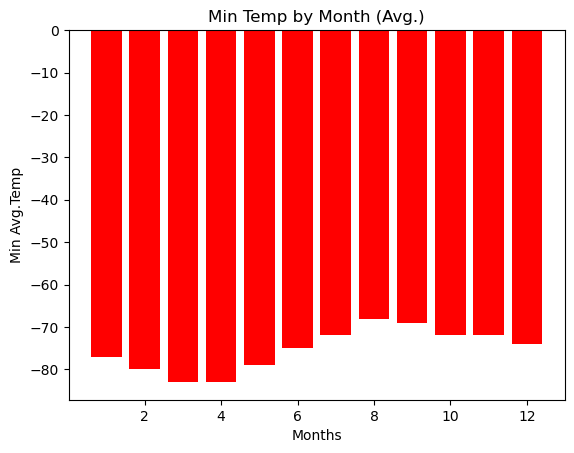

In [16]:
# Plot the average temperature by month
plt.bar(m_data_temp['month_nb'], m_data_temp['avg_min_temp'], color='red')
plt.xlabel('Months')
plt.ylabel('Min Avg.Temp')
plt.title('Min Temp by Month (Avg.)')
plt.show()

In [17]:
m_data_temp.dtypes

month_nb        int64
avg_min_temp    int64
dtype: object

In [18]:
# Identify the coldest and hottest months in Curiosity's location
min_temp = m_data_temp['avg_min_temp'].min()
min_temp_mth = m_data_temp.loc[m_data_temp['avg_min_temp'] == min_temp]
min_temp_mth

# plt.bar(min_temp_mth['month_nb'], min_temp_mth['avg_min_temp'], color='red')
# plt.xlabel('Months')
# plt.ylabel('Min Avg.Temp')
# plt.title('Min Temp by Month (Avg.)')
# plt.show()

,month_nb,avg_min_temp
2,3,-83
3,4,-83


In [19]:
max_temp = m_data_temp['avg_min_temp'].max()
max_temp_mth = m_data_temp.loc[m_data_temp['avg_min_temp'] == max_temp]
max_temp_mth

,month_nb,avg_min_temp
7,8,-68


In [20]:
# 4. Average pressure by Martian month
m_data_month = m_data.groupby('month')
m_data_pressure = m_data_month.mean().loc[:,['pressure']]
m_data_pressure

/var/folders/3c/pnxs9sq925115jh4gz7_xnhr0000gn/T/ipykernel_37054/2299218301.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  m_data_pressure = m_data_month.mean().loc[:,['pressure']]


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


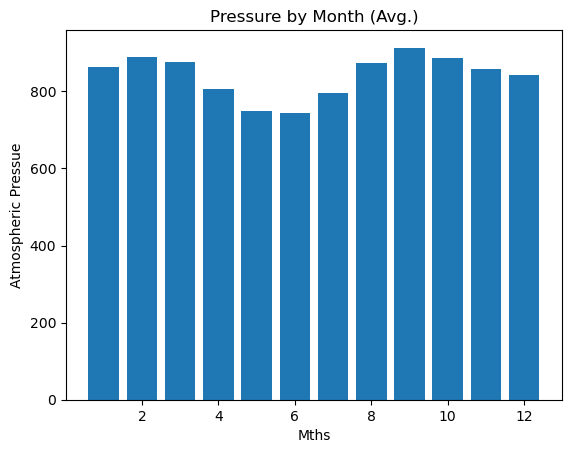

In [21]:
# Plot the average pressure by month
x = range(1, 13)
plt.bar(x, m_data_pressure['pressure'])
plt.xlabel('Mths')
plt.ylabel('Atmospheric Pressue')
plt.title('Pressure by Month (Avg.)')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

In [22]:
# 5. How many terrestrial (earth) days are there in a Martian year?
sun_long = m_data['ls'].loc[0]
#sun_long

sun_long_2 = m_data.loc[m_data['ls'] == sun_long]
#sun_long_2

terr_days = sun_long_2['terrestrial_date'].loc[0]
date_one_year = sun_long_2['terrestrial_date'].iloc[1]
martian_year = date_one_year - terr_days

print(f'There are approx.', martian_year, 'Earth days on Mars.')

There are approx. 686 days 00:00:00 Earth days on Mars.


<function matplotlib.pyplot.show(close=None, block=None)>

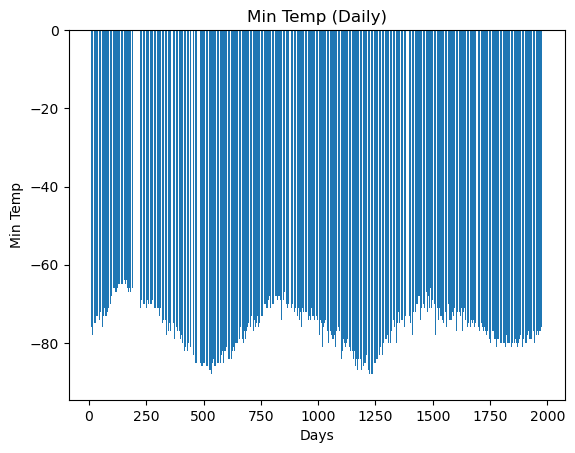

In [23]:
plt.bar(m_data['sol'], m_data['min_temp'])
plt.xlabel('Days')
plt.ylabel('Min Temp')
plt.title('Min Temp (Daily)')
plt.show

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
m_data.to_csv('mars_weather.csv', index=False)

In [25]:
browser.quit()